In [ ]:
"""
lightgbm tutorial
"""

In [1]:
!pip install lightgbm

In [130]:
## 필요한 패키지들을 불러오세요.
import pandas as pd 
from pandas import DataFrame, Series
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgbm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing as prep


In [3]:
## 주어진 파일명을 활용하여 데이터를 불러와 할당해 보세요. (weatherAUS.csv)
df = pd.read_csv("weatherAUS.csv")

In [4]:
## 데이터가 어떻게 생겼는지 5개 정도 row를 출력하여 확인해보세요.
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
## 데이터에 결측치가 얼마나 있는지 칼럼별로 확인해 보세요.
print("# of columns: ",len(df.columns))
print("# of rows: ",len(df))
print()
print(df.isna().sum(axis=0))

# of columns:  24
# of rows:  142193

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64


In [136]:
## 데이터가 너무 적은 칼럼과 분석 목표와 무관한 칼럼은 삭제해 보세요.
ratio = 0.4
cleanDF = df.dropna(axis='columns', thresh=len(df)*(1-ratio)) # 전체 데이터 크기의 40%이상이 결측치인 column 삭제
cleanDF.drop(labels=["Location","WindGustDir", "WindDir3pm", "WindDir9am"], axis=1, inplace=True)
cleanDF["RainTomorrow"].replace(["No", "Yes"], [0,1], inplace=True)
cleanDF["RainToday"].replace(["No", "Yes"], [0,1], inplace=True)

print("# of columns: ",len(cleanDF.columns))
print("# of rows: ",len(cleanDF))
print()
print(cleanDF.isna().sum(axis=0))

# of columns:  17
# of rows:  142193

Date                 0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64


/tmp/ipykernel_23828/2960048996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDF.drop(labels=["Location","WindGustDir", "WindDir3pm", "WindDir9am"], axis=1, inplace=True)
/tmp/ipykernel_23828/2960048996.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDF["RainTomorrow"].replace(["No", "Yes"], [0,1], inplace=True)
/tmp/ipykernel_23828/2960048996.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDF["RainToday"].

/tmp/ipykernel_23828/3479683715.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cleanDF.corr(method="pearson")


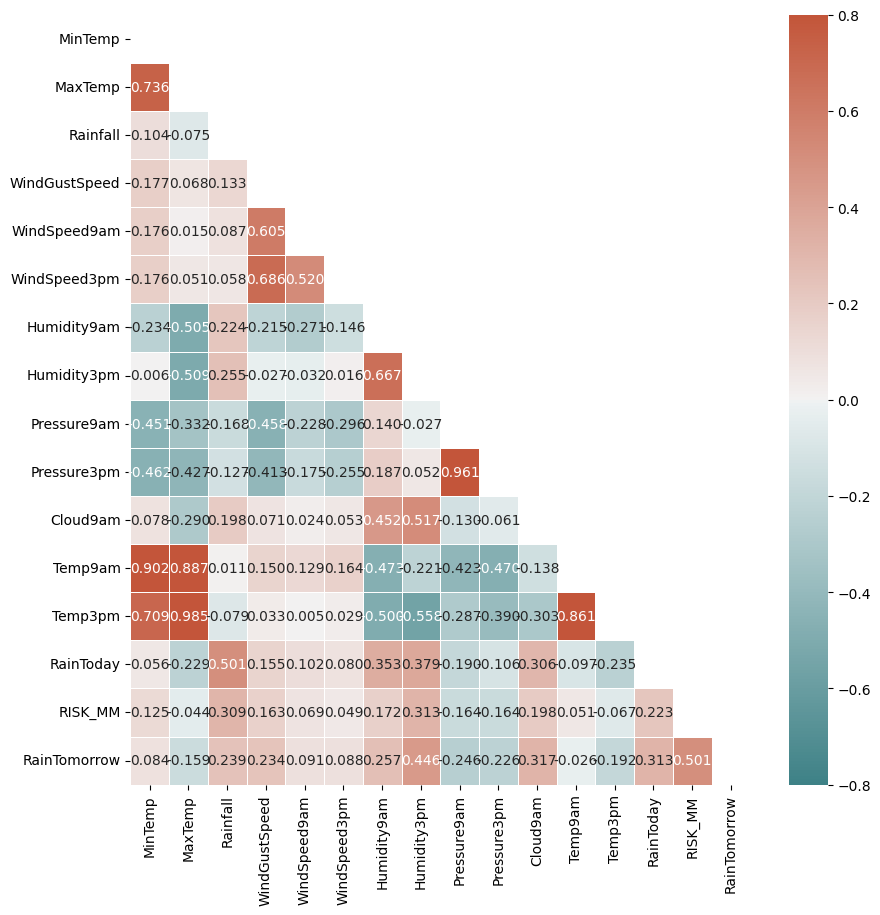

In [137]:
corr = cleanDF.corr(method="pearson")
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(200, 20, as_cmap=True)

plt.figure(figsize=(10,10))
sns.heatmap(data=corr, mask=mask, annot=True, fmt=".3f", linewidths=.5, cmap=cmap, vmin=-.8, vmax=.8)
plt.show()

In [138]:
cleanDF.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,16.9,21.8,0.0,0.0,0
1,2008-12-02,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,17.2,24.3,0.0,0.0,0
2,2008-12-03,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,21.0,23.2,0.0,0.0,0
3,2008-12-04,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,18.1,26.5,0.0,1.0,0
4,2008-12-05,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,17.8,29.7,0.0,0.2,0


In [139]:
## 결측치를 제거해 보세요.
cleanDF['Date'] = pd.to_datetime(cleanDF['Date']) # time series로 결측치를 interpolate하기 위해
cleanDF01 = cleanDF.set_index("Date")
cleanDF01.interpolate(method="time", axis=0, inplace=True)
cleanDF01.head()


/tmp/ipykernel_23828/604274272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDF['Date'] = pd.to_datetime(cleanDF['Date']) # time series로 결측치를 interpolate하기 위해


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,
2008-12-01,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,16.9,21.8,0.0,0.0,0
2008-12-02,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,2.0,17.2,24.3,0.0,0.0,0
2008-12-03,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,21.0,23.2,0.0,0.0,0
2008-12-04,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,18.1,26.5,0.0,1.0,0
2008-12-05,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,17.8,29.7,0.0,0.2,0


In [135]:
idx = df["RainToday"].index[df["RainToday"].apply(np.isnan)]

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [141]:
print("# of columns: ",len(cleanDF01.columns))
print("# of rows: ",len(cleanDF01))
print()
print(cleanDF01.isna().sum(axis=0))

# of columns:  16
# of rows:  142193

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


In [25]:
## 이상치를 규정하고 제거해보세요.

# _, ax = plt.subplots(nrows=len(cleanDF01.columns), figsize=(6, 40))
# for idx, col in enumerate(cleanDF01.columns):
#     plt.ylabel(col)
#     sns.histplot(cleanDF01[col], ax=ax[idx])

Error in callback <function flush_figures at 0x7f6d505af280> (for post_execute):


KeyboardInterrupt: 

In [26]:
## 이상치를 규정하고 제거해보세요.

print(len(cleanDF01))

q3 = cleanDF01.quantile(0.75)
q1 = cleanDF01.quantile(0.25)
iqr = q3 - q1
weight = 2.5

for col in cleanDF01.columns:
    if col in ['Rainfall', 'RainToday', 'RainTomorrow']:
        continue
    
    if col in ['MinTemp', 'MaxTemp', 'Temp3pm'] :
        condition = (cleanDF01[col] > q3[col] + weight*iqr[col]) | (cleanDF01[col] < q1[col] - weight*iqr[col])
        out_idx = cleanDF01[condition].index
        cleanDF01.drop(out_idx, inplace=True)

    elif col in ['WindSpeed9am', 'WindSpeed3pm'] :
        condition = cleanDF01[col] > q3[col] + weight*iqr[col]
        out_idx = cleanDF01[condition].index
        cleanDF01.drop(out_idx, inplace=True)
    
    elif col in ['Humidity9am', 'Humidity3pm'] :
        condition = cleanDF01[col] < q1[col] - weight*iqr[col]
        out_idx = cleanDF01[condition].index
        cleanDF01.drop(out_idx, inplace=True)

print(len(cleanDF01))

142193


/tmp/ipykernel_23828/1738493498.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = cleanDF01.quantile(0.75)
/tmp/ipykernel_23828/1738493498.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = cleanDF01.quantile(0.25)


126176


In [27]:
## 범주형 칼럼들을 머신러닝에 활용할 수 있게 숫자로 변경해 보세요.
cleanDF01["RainTomorrow"].replace(["No", "Yes"], [0,1], inplace=True)
cleanDF01["RainToday"].replace(["No", "Yes"], [0,1], inplace=True)
cleanDF01.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,
2008-12-01,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,16.9,21.8,0.0,0.0,0
2008-12-02,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,2.0,17.2,24.3,0.0,0.0,0
2008-12-03,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,21.0,23.2,0.0,0.0,0
2008-12-04,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,18.1,26.5,0.0,1.0,0
2008-12-05,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,17.8,29.7,0.0,0.2,0


In [54]:
cleanDF01.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM',
       'RainTomorrow'],
      dtype='object')

In [123]:
scaler = prep.MinMaxScaler()
# scaler = prep.StandardScaler()
scaler.fit(cleanDF01)
print(len(scaler.data_max_))
print(scaler.data_max_)
print()

train_data = scaler.transform(cleanDF01)
print(train_data.shape)
print()

X, y = train_data[:,:-1], train_data[:,-1]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=0)
X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)
del X_temp
del y_temp
print(X_train.shape)
print(y_train.shape)
print()
print(X_eval.shape)
print(y_eval.shape)
print(X_test.shape)
print(y_test.shape)
print()
print((len(y_eval)-y_eval.sum())/len(y_eval)*100) # valid set에서의 0의 비율
print((len(y_test)-y_test.sum())/len(y_test)*100) # test set에서의 0의 비율

16
[3.3900e+01 4.8100e+01 3.7100e+02 1.3500e+02 4.8000e+01 5.0000e+01
 1.0000e+02 1.0000e+02 1.0410e+03 1.0396e+03 9.0000e+00 4.0200e+01
 4.6700e+01 1.0000e+00 3.7100e+02 1.0000e+00]

(126176, 16)

(75705, 15)
(75705,)

(25235, 15)
(25235,)
(25236, 15)
(25236,)

78.19694868238558
77.69852591535901


In [125]:
clf = lgbm.LGBMClassifier(
    objective="binary",
    n_estimators=10000,
    random_state=0
)
eval_set = [(X_eval, y_eval)]

In [126]:
clf.fit(
    X_train, 
    y_train,
    eval_set=eval_set,
    early_stopping_rounds=100,
    eval_metric="binary_logloss",
)

/home/ljj0512/.conda/envs/torch/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.430482
[2]	valid_0's binary_logloss: 0.365545
[3]	valid_0's binary_logloss: 0.315613
[4]	valid_0's binary_logloss: 0.275292
[5]	valid_0's binary_logloss: 0.241797
[6]	valid_0's binary_logloss: 0.213458
[7]	valid_0's binary_logloss: 0.189171
[8]	valid_0's binary_logloss: 0.168159
[9]	valid_0's binary_logloss: 0.149848
[10]	valid_0's binary_logloss: 0.133801
[11]	valid_0's binary_logloss: 0.119674
[12]	valid_0's binary_logloss: 0.10719
[13]	valid_0's binary_logloss: 0.0961253
[14]	valid_0's binary_logloss: 0.0862922
[15]	valid_0's binary_logloss: 0.0775346
[16]	valid_0's binary_logloss: 0.0697202
[17]	valid_0's binary_logloss: 0.0627362
[18]	valid_0's binary_logloss: 0.0564856
[19]	valid_0's binary_logloss: 0.0508846
[20]	valid_0's binary_logloss: 0.0458603
[21]	valid_0's binary_logloss: 0.0413492
[22]	valid_0's binary_logloss: 0.0372955
[23]	valid_0's binary_logloss: 0.0336501
[24]	valid_0's binary_logloss: 0.0303698
[25]	valid_0's binary_logloss: 0.02741

LGBMClassifier(n_estimators=10000, objective='binary', random_state=0)

In [129]:
preds = clf.predict(X_test)
f1 = metrics.f1_score(y_true=y_test, y_pred=preds, average="macro")
acc = (preds==y_test).sum()/len(preds)
print(f"f1 score(macro): {f1}")
print(f"accuracy: {acc}")
print(f"accuracy: {clf.score(X_test, y_test)}")

f1 score(macro): 1.0
accuracy: 1.0
accuracy: 1.0


In [85]:
x = np.array([1.0, 0.5, 0.2])
y = np.array([2.0, 0.5, 0.2])
print((x==y).sum())

2
